# 9.3)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


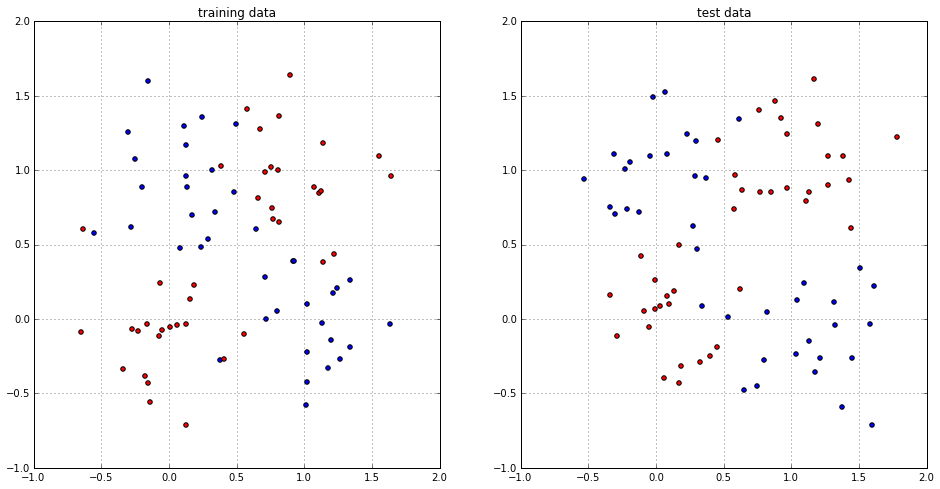

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline

# generate data

def generate_data(n):
    n = n/4
    std = np.sqrt(0.1)
    x1 = np.vstack([np.random.normal(0, std, n), np.random.normal(1, std, n)])
    x2 = np.vstack([np.random.normal(1, std, n), np.random.normal(0, std, n)])
    x3 = np.vstack([np.random.normal(0, std, n), np.random.normal(0, std, n)])
    x4 = np.vstack([np.random.normal(1, std, n), np.random.normal(1, std, n)])

    X1 = np.hstack([x1, x2]).T
    X2 = np.hstack([x3, x4]).T
    Y = np.hstack([-np.ones(2*n), np.ones(2*n)])
    return np.vstack([np.hstack([X1.T, X2.T]), Y]).T

data_training = generate_data(80)
data_test = generate_data(80)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(data_training[0:39,0],data_training[0:39,1])
plt.scatter(data_training[40:,0],data_training[40:,1],c='r')
plt.title('training data')
plt.xlim((-1,2))
plt.ylim((-1,2))
plt.grid()
plt.subplot(1,2,2)
plt.scatter(data_test[0:39,0],data_test[0:39,1])
plt.scatter(data_test[40:,0],data_test[40:,1],c='r')
plt.title('test data')
plt.xlim((-1,2))
plt.ylim((-1,2))
plt.grid()


## a)

In [62]:
# C-SVC 
clf = SVC()
clf.fit(data_training[:,:2],data_training[:,2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## b) c)

0.1


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


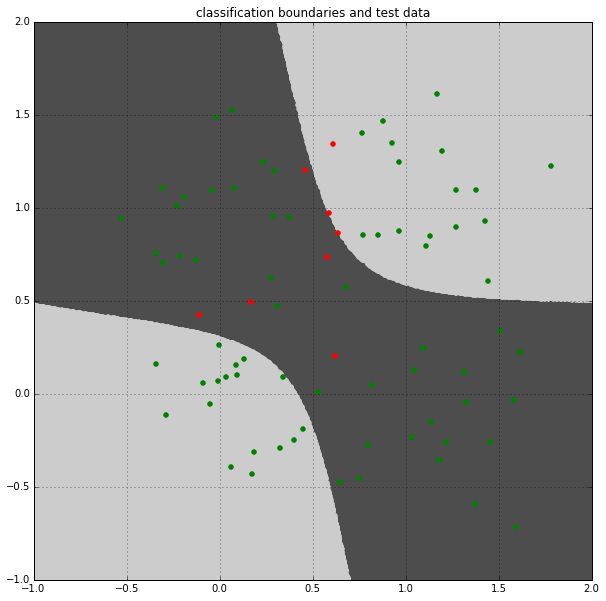

In [63]:
Y_test = np.array(np.zeros(len(data_training[:,2])))
Y_test = clf.predict(data_test[:,:2])
success = np.matrix([Y_test==data_test[:,2]]).astype(int)
lossfct = np.array([success==0]).astype(int)
indneg = np.where(success==0)
indpos = np.where(success==1)
negtest = data_test[indneg[1],:2]
postest = data_test[indpos[1],:2]

nsamples = 500000
testgrid = np.vstack((np.random.rand(nsamples)*3-1,np.random.rand(nsamples)*3-1)).T
gridval = clf.predict(testgrid)

neggrid = testgrid[gridval==-1,:]
posgrid = testgrid[gridval== 1,:]

plt.figure(figsize=(10,10))
plt.scatter(neggrid[:,0],neggrid[:,1],color='0.3')
plt.scatter(posgrid[:,0],posgrid[:,1],color='0.8')
plt.scatter(postest[:,0],postest[:,1],color='g')
plt.scatter(negtest[:,0],negtest[:,1],color='r')
plt.xlim((-1,2))
plt.ylim((-1,2))
plt.title('classification boundaries and test data')
plt.grid()

# 0/1 loss function already applied in success-vector for each test data point
# empirical risk: (number of wrong classifications)/(overall classifications)

EmpRisk = np.sum(lossfct)/80

clf_naive = clf

print(EmpRisk)


# 9.4)
## a)

In [ ]:
## defining parameter sequences
Ci = np.power(2*np.ones(21),np.array(range(21))-5.0)
gammaj = np.power(2*np.ones(19),np.array(range(19))-15.0)

## prepare test/ training data
v = len(Ci)*len(gammaj)

vdata = generate_data(80)
for i in range(v-1):
    vdata = np.vstack([vdata,generate_data(80)])

results = np.zeros((v,3)) # store EmpRisk for each combination of C and gamma
    
## functions for C-SVM

def CSVM_training(X,Y,Ci,gammaj):
    clf = SVC()
    clf.fit(X,Y)
    SVC(C = Ci, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3,gamma = gammaj, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    return clf

def CSVM_test(X,Y,clf):
    Y_test = clf.predict(X)
    success = np.matrix([Y_test==Y]).astype(int)
    EmpRisk = 1 - np.sum(success)/len(Y)
    return EmpRisk


##### cross-validation & grid-search #####
n=0
EmpRmin = 1
ind_1 = 0
ind_2 = 80

for i in range(len(Ci)):    
    for j in range(len(gammaj)):        
        
        X_test = vdata[ind_1:ind_2,:2]
        Y_test = vdata[ind_1:ind_2,2]
        X_training = np.vstack([vdata[:ind_1,:2],vdata[ind_2:,:2]])
        Y_training = np.concatenate([vdata[:ind_1,2],vdata[ind_2:,2]])
        
        clf = CSVM_training(X_training,Y_training,Ci[i],gammaj[j])
        EmpR = CSVM_test(X_test,Y_test,clf)
        
        results[n,:] = [Ci[i],gammaj[j],EmpR]
        
        if EmpR<EmpRmin:
            EmpRmin = EmpR
            clf_opt = clf
        
        n = n+1
        ind_1 = ind_1+80
        ind_2 = ind_2+80

        
plt.figure(figsize=(10,10))
plt.plot(results[:,2])
plt.grid()
plt.xlabel('n')
plt.ylabel('EmpR')

print(EmpRmin)
    

## b)

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


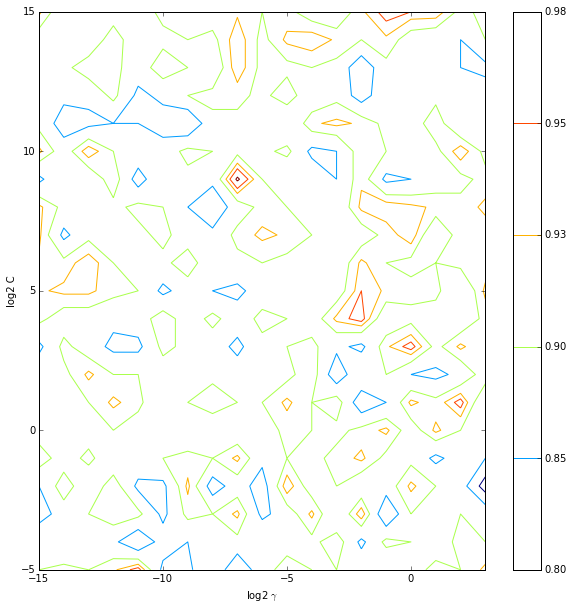

In [47]:
from matplotlib import colors, ticker, cm

x = np.log2(gammaj)
y = np.log2(Ci)
z = np.subtract(1,results[:,2])
Z = np.reshape(z,(len(Ci),len(gammaj)))

plt.figure(figsize=(10,10))
levels = np.array([0.8, 0.85, 0.9, 0.93, 0.95, 0.98])
plt.contour(x,y,Z,levels)
plt.xlabel('log2 $\gamma$')
plt.ylabel('log2 C')
cbar = plt.colorbar()


OPT = results[np.argmax(z),:2]
Copt = OPT[0]
gammaopt = OPT[1]



## c)

//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


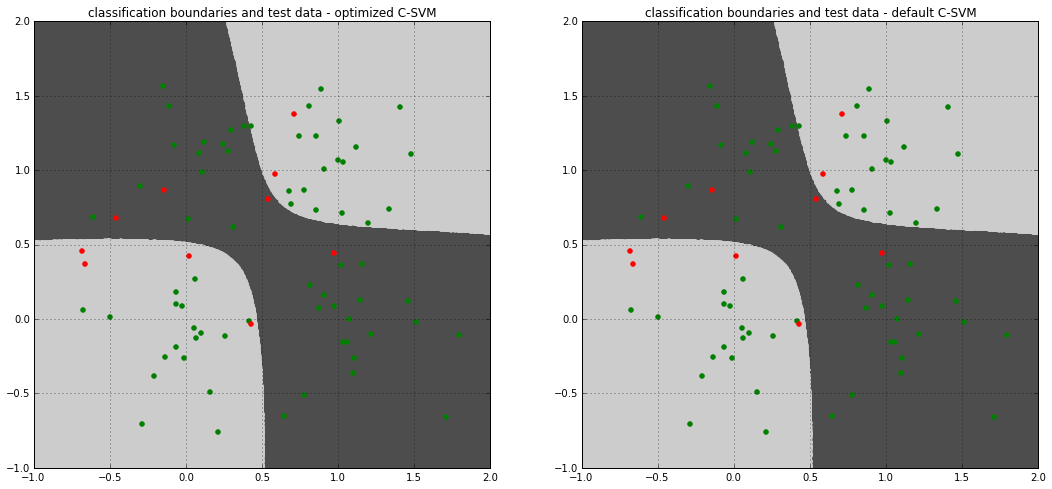

In [60]:
clfOpt = CSVM_training(data_training[:,:2],data_training[:,2],Copt,8)

Y_testOpt = clfOpt.predict(data_test[:,:2])
gridvalOpt = clfOpt.predict(testgrid)
neggridOpt = testgrid[gridvalOpt==-1,:]
posgridOpt = testgrid[gridvalOpt== 1,:]

successOpt = np.matrix([Y_testOpt==data_test[:,2]]).astype(int)
indnegOpt = np.where(successOpt==0)
indposOpt = np.where(successOpt==1)
negtestOpt = data_test[indnegOpt[1],:2]
postestOpt = data_test[indposOpt[1],:2]

plt.figure(figsize=(18,8))
plt.subplot(1,2,2)
plt.scatter(neggrid[:,0],neggrid[:,1],color='0.3')
plt.scatter(posgrid[:,0],posgrid[:,1],color='0.8')
plt.scatter(postest[:,0],postest[:,1],color='g')
plt.scatter(negtest[:,0],negtest[:,1],color='r')
plt.xlim((-1,2))
plt.ylim((-1,2))
plt.title('classification boundaries and test data - default C-SVM')
plt.grid()

plt.subplot(1,2,1)
plt.scatter(neggridOpt[:,0],neggridOpt[:,1],color='0.3')
plt.scatter(posgridOpt[:,0],posgridOpt[:,1],color='0.8')
plt.scatter(postestOpt[:,0],postestOpt[:,1],color='g')
plt.scatter(negtestOpt[:,0],negtestOpt[:,1],color='r')
plt.xlim((-1,2))
plt.ylim((-1,2))
plt.title('classification boundaries and test data - optimized C-SVM')
plt.grid()
